# Final Project 
## Stock Market Predication Project

### Shiv Kalaria

In [1]:
from copy import deepcopy as copy
from IPython.core.debugger import set_trace

import tensorflow as tf
from tensorflow import keras 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline


In [2]:
bofa_df = pd.read_csv('BAC.csv')
bofa_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-01-02,13.920000,14.570000,13.710000,14.330000,12.733791,86580700
1,2009-01-05,14.380000,14.550000,13.890000,13.980000,12.422776,93640500
2,2009-01-06,14.270000,14.810000,14.070000,14.280000,12.689362,111015400
3,2009-01-07,14.110000,14.130000,13.610000,13.710000,12.182853,112810000
4,2009-01-08,13.820000,13.990000,13.350000,13.540000,12.031786,93943500
...,...,...,...,...,...,...,...
2763,2019-12-24,35.189999,35.279999,35.119999,35.220001,34.996696,13805400
2764,2019-12-26,35.320000,35.560001,35.290001,35.520000,35.294796,26992100
2765,2019-12-27,35.700001,35.720001,35.259998,35.349998,35.125870,28111300
2766,2019-12-30,35.570000,35.650002,35.090000,35.150002,34.927143,30705100


In [3]:
input_x = bofa_df.iloc[:, 1:4].copy()
volu = bofa_df[['Volume']].copy()
input_x = pd.concat([input_x,volu].copy(), axis=1)
mod_df = pd.concat([input_x,bofa_df[['Close']].copy()], axis=1)
mod_df

,Open,High,Low,Volume,Close
0,13.920000,14.570000,13.710000,86580700,14.330000
1,14.380000,14.550000,13.890000,93640500,13.980000
2,14.270000,14.810000,14.070000,111015400,14.280000
3,14.110000,14.130000,13.610000,112810000,13.710000
4,13.820000,13.990000,13.350000,93943500,13.540000
...,...,...,...,...,...
2763,35.189999,35.279999,35.119999,13805400,35.220001
2764,35.320000,35.560001,35.290001,26992100,35.520000
2765,35.700001,35.720001,35.259998,28111300,35.349998
2766,35.570000,35.650002,35.090000,30705100,35.150002


In [4]:
stock_open = bofa_df[['Open']].copy()
# stock_open

In [5]:
stock_close = bofa_df[['Close']].copy()
# stock_close

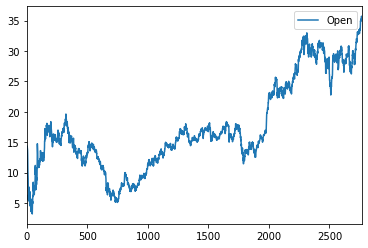

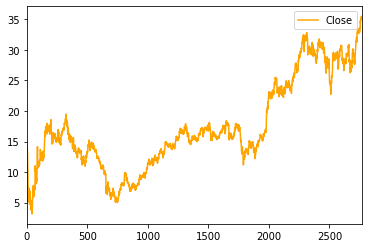

In [6]:
stk_open_plt = stock_open.plot()
stk_close_plt = stock_close.plot(color='orange')

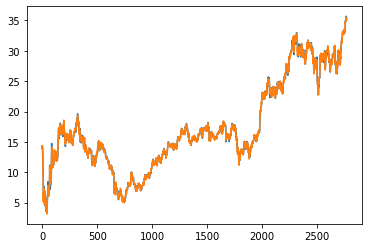

In [7]:
plt.plot(stock_open)
plt.plot(stock_close)

In [38]:
# for i,c in emumerate(stock_open.columns.values):
#     stock_open.plot.scatter(c,'Open')
# # plt.hist(bofa_df.loc[:,'Close'])

NameError: name 'emumerate' is not defined

In [8]:
X = bofa_df.iloc[:, 1:4].copy()
vol = bofa_df[['Volume']].copy()
X = pd.concat([X,vol].copy(), axis=1)
# X = X.values
X

,Open,High,Low,Volume
0,13.920000,14.570000,13.710000,86580700
1,14.380000,14.550000,13.890000,93640500
2,14.270000,14.810000,14.070000,111015400
3,14.110000,14.130000,13.610000,112810000
4,13.820000,13.990000,13.350000,93943500
...,...,...,...,...
2763,35.189999,35.279999,35.119999,13805400
2764,35.320000,35.560001,35.290001,26992100
2765,35.700001,35.720001,35.259998,28111300
2766,35.570000,35.650002,35.090000,30705100


In [9]:
# X.shape #(2768,4)
# Xnew = X.drop(2767, axis=0)#this drops it but keep that row as NaN! use delete for np
# Xnew = X.iloc[:2767,:] #same problem as above
X = X.values
Xnew = np.delete(X, 2767, axis=0)
Xnew #(2767,4)

array([[1.3920000e+01, 1.4570000e+01, 1.3710000e+01, 8.6580700e+07],
       [1.4380000e+01, 1.4550000e+01, 1.3890000e+01, 9.3640500e+07],
       [1.4270000e+01, 1.4810000e+01, 1.4070000e+01, 1.1101540e+08],
       ...,
       [3.5320000e+01, 3.5560001e+01, 3.5290001e+01, 2.6992100e+07],
       [3.5700001e+01, 3.5720001e+01, 3.5259998e+01, 2.8111300e+07],
       [3.5570000e+01, 3.5650002e+01, 3.5090000e+01, 3.0705100e+07]])

In [10]:
T = bofa_df[['Close']].copy()
T

,Close
0,14.330000
1,13.980000
2,14.280000
3,13.710000
4,13.540000
...,...
2763,35.220001
2764,35.520000
2765,35.349998
2766,35.150002


In [11]:
T = T.values
Tnew = np.delete(T, 0, axis=0)
Tnew

array([[13.98    ],
       [14.28    ],
       [13.71    ],
       ...,
       [35.349998],
       [35.150002],
       [35.220001]])

In [12]:
new_bofa = np.concatenate((Xnew,Tnew),axis=1)
new_bofa

array([[1.3920000e+01, 1.4570000e+01, 1.3710000e+01, 8.6580700e+07,
        1.3980000e+01],
       [1.4380000e+01, 1.4550000e+01, 1.3890000e+01, 9.3640500e+07,
        1.4280000e+01],
       [1.4270000e+01, 1.4810000e+01, 1.4070000e+01, 1.1101540e+08,
        1.3710000e+01],
       ...,
       [3.5320000e+01, 3.5560001e+01, 3.5290001e+01, 2.6992100e+07,
        3.5349998e+01],
       [3.5700001e+01, 3.5720001e+01, 3.5259998e+01, 2.8111300e+07,
        3.5150002e+01],
       [3.5570000e+01, 3.5650002e+01, 3.5090000e+01, 3.0705100e+07,
        3.5220001e+01]])

In [13]:
new_bofa_df = pd.DataFrame(new_bofa)
new_bofa_df

,0,1,2,3,4
0,13.920000,14.570000,13.710000,86580700.0,13.980000
1,14.380000,14.550000,13.890000,93640500.0,14.280000
2,14.270000,14.810000,14.070000,111015400.0,13.710000
3,14.110000,14.130000,13.610000,112810000.0,13.540000
4,13.820000,13.990000,13.350000,93943500.0,12.990000
...,...,...,...,...,...
2762,35.040001,35.189999,34.950001,33995400.0,35.220001
2763,35.189999,35.279999,35.119999,13805400.0,35.520000
2764,35.320000,35.560001,35.290001,26992100.0,35.349998
2765,35.700001,35.720001,35.259998,28111300.0,35.150002


In [14]:
Xnew_df = pd.DataFrame(Xnew)
Xnew_df.describe()

,0,1,2,3
count,2767.000000,2767.000000,2767.000000,2.767000e+03
mean,17.396263,17.590296,17.187647,1.391583e+08
std,7.365945,7.398596,7.342651,1.166568e+08
min,3.220000,3.510000,2.530000,1.380540e+07
25%,12.645000,12.850000,12.420000,6.648340e+07
50%,15.700000,15.860000,15.550000,1.010542e+08
75%,23.214999,23.464999,23.000000,1.679082e+08
max,35.700001,35.720001,35.290001,1.226791e+09


In [38]:
mu = np.mean(Xnew, axis=0)
std = np.std(Xnew, axis=0)
X_norm = (Xnew - mu)/std
pd.DataFrame(X_norm).describe()

,0,1,2,3
count,2.767000e+03,2.767000e+03,2.767000e+03,2.767000e+03
mean,4.681634e-16,1.840876e-16,-5.002624e-16,5.210465e-16
std,1.000181e+00,1.000181e+00,1.000181e+00,1.000181e+00
min,-1.924916e+00,-1.903448e+00,-1.996595e+00,-1.074738e+00
25%,-6.451477e-01,-6.408180e-01,-6.494261e-01,-6.230928e-01
50%,-2.303262e-01,-2.339105e-01,-2.230725e-01,-3.266931e-01
75%,7.900939e-01,7.941729e-01,7.917309e-01,2.464932e-01
max,2.485363e+00,2.450868e+00,2.465816e+00,9.325042e+00


In [39]:
import partitionlib as ptl
# just in case, you made change in the file, you may need to reload as below
import importlib
import partitionlib
importlib.reload(partitionlib);

def partition_data(X, T):
    """Partition data into train and test splits."""
    data, targets = ptl.partition(copy(X), copy(T))
    Xtrain, Xtest = data
    Ttrain, Ttest = targets
    
    return Xtrain, Xtest, Ttrain, Ttest

In [40]:
Xtrain, Xtest, Ttrain, Ttest = partition_data(X_norm, Tnew)
print("Train data shape: {}".format(Xtrain.shape))
print("Train target shape: {}".format(Ttrain.shape))
print("Test data shape: {}".format(Xtest.shape))
print("Test target shape: {}".format(Ttest.shape))

Train data shape: (2214, 4)
Train target shape: (2214, 1)
Test data shape: (553, 4)
Test target shape: (553, 1)


In [41]:
Ttrain

array([[12.75    ],
       [17.1     ],
       [31.059999],
       ...,
       [29.799999],
       [32.84    ],
       [16.459999]])

In [55]:
N, D = X_norm.shape
Ntrain, Ntest = Xtrain.shape[0], Xtest.shape[0]
print("Number of total samples: {}".format(N))
print("Number of total features: {}".format(D))
print("Number of training samples: {}".format(Ntrain))
print("Number of testing samples: {}".format(Ntest))

Number of total samples: 2767
Number of total features: 4
Number of training samples: 2214
Number of testing samples: 553


In [112]:
model = keras.Sequential([
    keras.layers.Input(shape=(D,)),
    keras.layers.Dense(50, activation='relu'),#50 becuase of price below that
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(1)
])

In [113]:
model.compile(optimizer='adam', loss='mse')


In [114]:
history = model.fit(Xtrain, Ttrain, epochs=100, batch_size=1000)

Train on 2214 samples
Epoch 1/100
2214/2214 [==============================] - 0s 112us/sample - loss: 352.6879
Epoch 2/100
2214/2214 [==============================] - 0s 4us/sample - loss: 346.3486
Epoch 3/100
2214/2214 [==============================] - 0s 5us/sample - loss: 339.8867
Epoch 4/100
2214/2214 [==============================] - 0s 4us/sample - loss: 333.2862
Epoch 5/100
2214/2214 [==============================] - 0s 6us/sample - loss: 326.5017
Epoch 6/100
2214/2214 [==============================] - 0s 6us/sample - loss: 318.8216
Epoch 7/100
2214/2214 [==============================] - 0s 5us/sample - loss: 310.1684
Epoch 8/100
2214/2214 [==============================] - 0s 4us/sample - loss: 300.4875
Epoch 9/100
2214/2214 [==============================] - 0s 4us/sample - loss: 289.3061
Epoch 10/100
2214/2214 [==============================] - 0s 5us/sample - loss: 275.9202
Epoch 11/100
2214/2214 [==============================] - 0s 6us/sample - loss: 259.8322
Epoch 

In [115]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             multiple                  250       
_________________________________________________________________
dense_37 (Dense)             multiple                  2550      
_________________________________________________________________
dense_38 (Dense)             multiple                  2550      
_________________________________________________________________
dense_39 (Dense)             multiple                  51        
Total params: 5,401
Trainable params: 5,401
Non-trainable params: 0
_________________________________________________________________


Text(0, 0.5, 'loss')

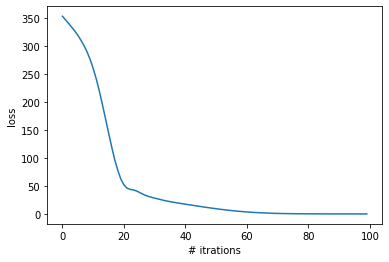

In [116]:
plt.plot(history.history['loss'])
plt.xlabel("# itrations")
plt.ylabel("loss")

In [117]:
error = model.evaluate(Xtest, Ttest)
error

553/553 [==============================] - 0s 109us/sample - loss: 0.2064


0.20636252091547463

In [118]:
def plot_result(Y, T, title=None):
    """
        Plots predicted and true labels.
        
        Args:
            Y (numpy.ndarray): Predicted labels
            
            T (numpy.ndarray): True labels
            
            title (str): Title for the plot
    """
    if len(T.shape) > 1:
        T = T.squeeze()
    # plot in sorted order
    sorted_i = np.argsort(T)

    plt.figure(figsize=[5,5])
    plt.plot(Y[sorted_i], 'b.', label="prediction")
    plt.plot(T[sorted_i], 'r-', label="target")
    plt.legend()
    plt.ylabel("Stock price")
    plt.xlabel("days(samples)")
#     plt.ylim([-1,4])
    plt.title(title)
    
    # accuracy
#     print("Acc: {} %".format(100 * np.sum(Y==T)/T.shape[0]))

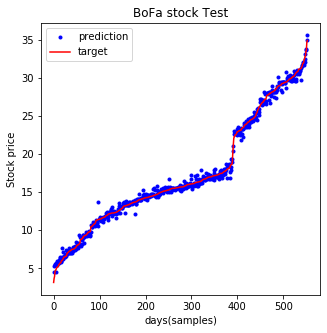

In [119]:
pred = model.predict(Xtest)
plot_result(pred, Ttest, title="BoFa stock Test")

In [120]:
fivePercentOff = 0
tenPercentOff = 0
belowFivePercent = 0

for i in range(len(pred)):
    if(abs(pred[i] - Ttest[i]) > Ttest[i]*.1):
        tenPercentOff  += 1
    elif(abs(pred[i] - Ttest[i]) > Ttest[i]*.05):
        fivePercentOff += 1
    else:
        belowFivePercent += 1
        

print(belowFivePercent)
print(fivePercentOff)
print(tenPercentOff)


504
33
16
